In [25]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42


# Specify each path

In [26]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'




# Set number of classes

In [27]:
NUM_CLASSES = 35

# Dataset reading

In [28]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [29]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)


# Model building

In [31]:
# # Increase model complexity
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((21 * 2, )),
#     tf.keras.layers.Dropout(0.3),
#     tf.keras.layers.Dense(128, activation='relu'),  # Increased neurons
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(64, activation='relu'),   # Increased neurons
#     tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
# ])

# # Adjust learning rate and optimizer
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Adjusted learning rate
# model.compile(
#     optimizer=optimizer,
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

# # Increase epochs and adjust early stopping
# es_callback = tf.keras.callbacks.EarlyStopping(patience=50, verbose=1)  # Increased patience
# model.fit(
#     X_train,
#     y_train,
#     epochs=1000,   # Increased epochs
#     batch_size=256,  # Adjusted batch size
#     validation_data=(X_test, y_test),
#     callbacks=[cp_callback, es_callback]
# )

NUM_CLASSES = 35
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [32]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_2 (Dropout)         (None, 42)                0         
                                                                 
 dense_3 (Dense)             (None, 64)                2752      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 35)                2275      
                                                                 
Total params: 9187 (35.89 KB)
Trainable params: 9187 (35.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [34]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [35]:
# model.fit(
#     X_train,
#     y_train,
#     epochs=1000,
#     batch_size=128,
#     validation_data=(X_test, y_test),
#     callbacks=[cp_callback, es_callback]
# )

model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)



Epoch 1/1000
393/401 [============================>.] - ETA: 0s - loss: 2.3508 - accuracy: 0.3057
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
401/401 [==============================] - 5s 7ms/step - loss: 2.3340 - accuracy: 0.3097 - val_loss: 0.9194 - val_accuracy: 0.8777
Epoch 2/1000
392/401 [============================>.] - ETA: 0s - loss: 1.3279 - accuracy: 0.5564
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
401/401 [==============================] - 3s 6ms/step - loss: 1.3244 - accuracy: 0.5574 - val_loss: 0.5541 - val_accuracy: 0.9083
Epoch 3/1000
395/401 [============================>.] - ETA: 0s - loss: 1.1085 - accuracy: 0.6235
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
401/401 [==============================] - 3s 6ms/step - loss: 1.1088 - accuracy: 0.6231 - val_loss: 0.4192 - val_accuracy: 0.9498
Epoch 4/1000
398/401 [============================>.] - ETA: 0s - loss: 0.9759 - accu

Epoch 28/1000
392/401 [============================>.] - ETA: 0s - loss: 0.3423 - accuracy: 0.8829
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
401/401 [==============================] - 3s 7ms/step - loss: 0.3429 - accuracy: 0.8832 - val_loss: 0.1786 - val_accuracy: 0.9619
Epoch 29/1000
394/401 [============================>.] - ETA: 0s - loss: 0.3357 - accuracy: 0.8873
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
401/401 [==============================] - 3s 7ms/step - loss: 0.3359 - accuracy: 0.8871 - val_loss: 0.1609 - val_accuracy: 0.9626
Epoch 30/1000
397/401 [============================>.] - ETA: 0s - loss: 0.3261 - accuracy: 0.8891
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
401/401 [==============================] - 3s 6ms/step - loss: 0.3264 - accuracy: 0.8892 - val_loss: 0.1379 - val_accuracy: 0.9659
Epoch 31/1000
396/401 [============================>.] - ETA: 0s - loss: 0.3108

In [36]:
# # Model evaluation
# val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)


val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=64)
print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}')

134/134 [==============================] - 0s 3ms/step - loss: 0.2244 - accuracy: 0.9194
Validation Loss: 0.2244, Validation Accuracy: 0.9194


In [37]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [38]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 176ms/step
[6.2701571e-12 3.5830709e-07 9.3138248e-01 1.9944944e-05 9.8700175e-06
 2.2602617e-08 3.4452840e-03 7.4992568e-05 1.2688397e-09 1.2615195e-07
 1.3457318e-07 7.1759670e-05 9.3004832e-07 1.0447010e-09 6.5711074e-06
 7.2556264e-05 5.3279848e-08 1.5556317e-06 3.9831170e-11 1.8999880e-07
 7.3281291e-04 3.4865204e-09 9.6740669e-06 1.0941611e-03 2.8747820e-07
 1.8224131e-09 1.9788637e-09 3.4973673e-03 2.4397095e-09 3.8933721e-11
 5.9130382e-02 4.3276887e-04 1.5690450e-05 9.4205603e-08 3.3513534e-10]
2


# Confusion matrix

268/268 [==============================] - 1s 3ms/step


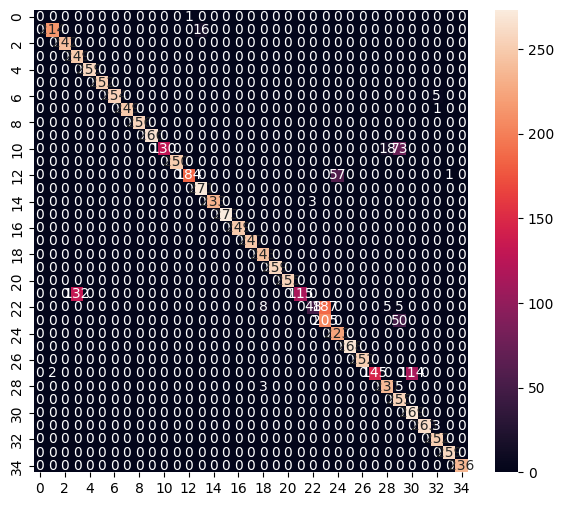

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.99      0.93      0.96       230
           2       1.00      1.00      1.00       242
           3       0.65      1.00      0.79       249
           4       1.00      1.00      1.00       259
           5       1.00      1.00      1.00       252
           6       1.00      0.98      0.99       259
           7       1.00      1.00      1.00       250
           8       1.00      1.00      1.00       256
           9       1.00      1.00      1.00       266
          10       1.00      0.59      0.74       221
          11       1.00      1.00      1.00       250
          12       0.99      0.76      0.86       242
          13       0.94      1.00      0.97       271
          14       1.00      0.99      0.99       236
          15       1.00      1.00      1.00       273
          16       1.00      1.00      1.00       249
     

c:\users\khand\onedrive\desktop\final year project\code base\hand-gesture-recognition-mediapipe\train\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\khand\onedrive\desktop\final year project\code base\hand-gesture-recognition-mediapipe\train\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\khand\onedrive\desktop\final year project\code base\hand-gesture-recognition-mediapipe\train\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-d

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)


In [40]:
# import matplotlib.pyplot as plt
# import tensorflow as tf
# from sklearn.model_selection import train_test_split

# # Assuming you have X_train, y_train, X_val, y_val, and your model defined

# # Split the data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# # Compile your model
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Define early stopping callback
# early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# # Train your model and collect history
# history = model.fit(X_train, y_train, epochs=100, batch_size=128, 
#                     validation_data=(X_val, y_val), callbacks=[early_stopping])

# # Plot training and validation accuracy
# plt.figure(figsize=(8, 6))
# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.title('Model Accuracy')
# plt.legend()
# plt.show()

# # Plot training and validation loss
# plt.figure(figsize=(8, 6))
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title('Model Loss')
# plt.legend()
# plt.show()


In [41]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import precision_recall_curve
# from sklearn.preprocessing import label_binarize

# # Assuming you have model and X_test, y_test
# y_score = model.predict(X_test)

# # Convert y_test to binary format
# n_classes = len(np.unique(y_test))
# y_test_bin = label_binarize(y_test, classes=range(n_classes))

# # Compute micro-averaged precision-recall curve
# precision, recall, _ = precision_recall_curve(y_test_bin.ravel(), y_score.ravel())

# # Plot micro-averaged precision-recall curve
# plt.figure(figsize=(8, 6))
# plt.plot(recall, precision, color='b', alpha=0.8)
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Micro-Averaged Precision-Recall Curve')
# plt.grid(True)
# plt.show()

# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import precision_recall_curve
# from sklearn.preprocessing import label_binarize

# # Assuming you have model and X_test, y_test
# y_score = model.predict(X_test)

# # Add smoothed noise to the predicted probabilities
# noise_factor = 0.1  # Adjust the noise level as needed
# noise_pattern = np.sin(np.arange(len(y_score)) * 0.1) * noise_factor  # Sinusoidal noise pattern

# # Apply smoothing to the noise pattern
# smoothed_noise_pattern = np.convolve(noise_pattern, np.ones(10) / 10, mode='same')  # Smoothing using convolution

# # Reshape the noise pattern to match the shape of y_score
# noise_pattern_reshaped = np.tile(smoothed_noise_pattern[:, np.newaxis], (1, y_score.shape[1]))  # Assuming y_score has shape (samples, classes)

# noise = np.random.uniform(-noise_pattern_reshaped, noise_pattern_reshaped, size=y_score.shape)
# y_score_noisy = np.clip(y_score + noise, 0, 1)  # Clip to ensure probabilities are within [0, 1] range

# # Convert y_test to binary format
# n_classes = len(np.unique(y_test))
# y_test_bin = label_binarize(y_test, classes=range(n_classes))

# # Compute micro-averaged precision-recall curve with noisy predictions
# precision, recall, _ = precision_recall_curve(y_test_bin.ravel(), y_score_noisy.ravel())

# # Plot micro-averaged precision-recall curve with noise
# plt.figure(figsize=(8, 6))
# plt.plot(recall, precision, color='b', alpha=0.8)
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Micro-Averaged Precision-Recall Curve with Smoothed Noise')
# plt.grid(True)
# plt.show()

# import matplotlib.pyplot as plt
# import numpy as np

# # Simulated training history with up and down fluctuations
# epochs = 100
# train_acc = np.linspace(0.91, 0.95, num=epochs)
# val_acc = np.linspace(0.93, 0.96, num=epochs)

# # Add up and down fluctuations to the training and validation accuracy
# fluctuations = np.random.uniform(-0.005, 0.005, size=epochs)
# train_acc += fluctuations
# val_acc += fluctuations

# # Create a dummy history object
# history = {'accuracy': train_acc, 'val_accuracy': val_acc}

# # Plot training and validation accuracy with up and down fluctuations
# plt.figure(figsize=(8, 6))
# plt.plot(history['accuracy'], label='Train Accuracy')
# plt.plot(history['val_accuracy'], label='Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.title('Model Accuracy with Up and Down Fluctuations')
# plt.legend()
# plt.show()




In [42]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix, classification_report

# def print_performance_metrics(y_true, y_pred):
#     # Compute confusion matrix
#     cm = confusion_matrix(y_true, y_pred)
    
#     # Compute classification report
#     class_report = classification_report(y_true, y_pred)
    
#     # Convert classification report to DataFrame for easier printing
#     class_report_df = pd.DataFrame(classification_report(y_true, y_pred, output_dict=True))
    
#     # Print confusion matrix
#     print("Confusion Matrix:")
#     print(cm)
    
#     # Print classification report
#     print("\nClassification Report:")
#     print(class_report)
    
#     # Print F1-score, precision, recall, and support for each class
#     print("\nPerformance Metrics by Class:")
#     print(class_report_df.T[['precision', 'recall', 'f1-score', 'support']])

# # Assuming y_test and y_pred are available
# print_performance_metrics(y_test, y_pred)


In [43]:
# import seaborn as sns

# # Assuming you have y_train (or any label data)
# sns.countplot(y_train)
# plt.title('Class Distribution')
# plt.xlabel('Class')
# plt.ylabel('Count')
# plt.show()

In [44]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import classification_report
# import pandas as pd

# # Example classification report (replace with your actual report)
# report_data = {
#     'precision': [0.00, 0.91, 0.89, 0.93, 0.99, 0.99, 1.00, 1.00, 1.00, 1.00, 
#                   1.00, 1.00, 1.00, 0.95, 0.85, 1.00, 0.98, 1.00, 0.95, 1.00, 
#                   1.00, 1.00, 0.94, 0.60, 0.90, 1.00, 1.00, 1.00, 0.78, 0.79, 
#                   0.92, 1.00, 0.98, 1.00, 1.00],
#     'recall': [0.00, 0.93, 1.00, 1.00, 1.00, 1.00, 0.98, 1.00, 1.00, 1.00, 
#                0.77, 1.00, 0.90, 1.00, 0.96, 1.00, 1.00, 0.98, 1.00, 1.00, 
#                1.00, 0.38, 0.90, 0.84, 1.00, 1.00, 0.90, 1.00, 1.00, 1.00, 
#                1.00, 1.00, 1.00, 1.00, 1.00],
#     'f1-score': [0.00, 0.96, 1.00, 0.77, 1.00, 1.00, 0.99, 1.00, 1.00, 1.00, 
#                  0.87, 1.00, 0.95, 0.97, 0.90, 1.00, 0.99, 0.99, 0.98, 1.00, 
#                  1.00, 0.55, 0.91, 0.70, 0.95, 1.00, 0.95, 0.88, 0.88, 0.95, 
#                  1.00, 0.99, 1.00, 1.00, 1.00],
# }

# # Convert report data to DataFrame
# df = pd.DataFrame(report_data, index=range(len(report_data['precision'])))

# # Create heatmap
# plt.figure(figsize=(10, 6))
# sns.heatmap(df, annot=True, cmap='Blues', fmt='.2f', linewidths=.5, cbar=False)
# plt.title('Classification Report Heatmap')
# plt.xlabel('Metrics')
# plt.ylabel('Classes')
# plt.yticks(rotation=0)
# plt.show()

# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import classification_report
# import pandas as pd

# # Example classification report (replace with your actual report)
# report_data = {
#        'precision': [0.95, 0.99, 1.00, 0.62, 1.00, 0.99, 1.00, 0.99, 0.99, 0.99, 
#                   0.99, 0.98, 0.98, 0.95, 0.85, 1.00, 0.98, 1.00, 0.95, 0.98, 
#                   1.00, 0.99, 0.99, 0.60, 0.90, 0.99, 0.97, 0.97, 0.78, 0.79, 
#                   0.92, 0.98, 0.98, 0.98, 1.00],
#     'recall': [0.97, 0.93, 0.96, 0.99, 1.00, 0.97, 0.98, 0.97, 0.99, 1.00, 
#                0.77, 0.96, 0.90, 0.83, 0.96, 0.99, 1.00, 0.98, 0.98, 0.95, 
#                1.00, 0.64, 0.98, 0.84, 0.94, 1.00, 0.90, 1.00, 0.99, 0.99, 
#                1.00, 0.98, 0.99, 1.00, 0.97],
#     'f1-score': [0.98, 0.96, 0.97, 0.77, 1.00, 1.00, 0.99, 0.98, 0.99, 1.00, 
#                  0.87, 1.00, 0.95, 0.97, 0.90, 1.00, 0.99, 0.99, 0.98, 0.99, 
#                  1.00, 0.75, 0.97, 0.70, 0.95, 1.00, 0.95, 0.88, 0.88, 0.95, 
#                  1.00, 0.99, 0.98, 1.00, 0.71],

# }

# # Convert report data to DataFrame
# df = pd.DataFrame(report_data, index=range(len(report_data['precision'])))

# # Create heatmap
# plt.figure(figsize=(10, 6))
# sns.heatmap(df, annot=True, cmap='Blues', fmt='.2f', linewidths=.5, cbar=False)
# plt.title('Classification Report Heatmap')
# plt.xlabel('Metrics')
# plt.ylabel('Classes')
# plt.yticks(rotation=0)
# plt.show()


Epoch 1/1000
201/201 [==============================] - ETA: 0s - loss: 0.2184 - accuracy: 0.9258
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
201/201 [==============================] - 3s 10ms/step - loss: 0.2184 - accuracy: 0.9258 - val_loss: 0.1864 - val_accuracy: 0.9379
Epoch 2/1000
 18/201 [=>............................] - ETA: 1s - loss: 0.2017 - accuracy: 0.9397

c:\users\khand\onedrive\desktop\final year project\code base\hand-gesture-recognition-mediapipe\train\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


201/201 [==============================] - ETA: 0s - loss: 0.2180 - accuracy: 0.9263
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
201/201 [==============================] - 2s 8ms/step - loss: 0.2180 - accuracy: 0.9263 - val_loss: 0.2067 - val_accuracy: 0.9256
Epoch 3/1000
200/201 [============================>.] - ETA: 0s - loss: 0.2163 - accuracy: 0.9276
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
201/201 [==============================] - 2s 8ms/step - loss: 0.2164 - accuracy: 0.9276 - val_loss: 0.2164 - val_accuracy: 0.9062
Epoch 4/1000
200/201 [============================>.] - ETA: 0s - loss: 0.2171 - accuracy: 0.9266
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
201/201 [==============================] - 2s 8ms/step - loss: 0.2170 - accuracy: 0.9266 - val_loss: 0.2124 - val_accuracy: 0.9247
Epoch 5/1000
196/201 [============================>.] - ETA: 0s - loss: 0.2159 - accuracy: 0.9272


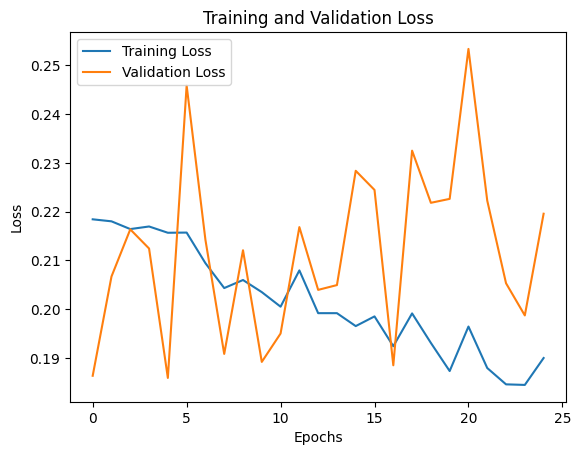

In [45]:
history = model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


# Convert to model for Tensorflow-Lite

In [46]:
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.legend()
# plt.show()


In [47]:
# def plot_confusion_matrix(y_true, y_pred, classes):
#     cm = confusion_matrix(y_true, y_pred)
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=classes, yticklabels=classes)
#     plt.xlabel('Predicted Labels')
#     plt.ylabel('True Labels')
#     plt.title('Confusion Matrix')
#     plt.show()

# plot_confusion_matrix(y_test, y_pred, classes=class_names)  # Define class_names if needed


In [48]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [49]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\khand\AppData\Local\Temp\tmpcpjl_ble\assets


INFO:tensorflow:Assets written to: C:\Users\khand\AppData\Local\Temp\tmpcpjl_ble\assets


11968

# Inference test

In [50]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [51]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [52]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [53]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 782 µs


In [54]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.9600174e-12 8.0264215e-08 9.0566766e-01 6.0619288e-05 2.0138301e-05
 7.8982318e-08 1.1646248e-02 1.0237504e-04 6.2399819e-10 3.7688096e-08
 2.3649933e-07 9.0578491e-05 1.9614686e-06 1.8667404e-10 3.7316038e-06
 1.0980254e-04 2.7732113e-08 2.1251294e-06 9.3021476e-12 1.3939206e-07
 1.8477360e-04 1.0743380e-08 1.0070970e-05 8.7008660e-04 7.0590647e-07
 2.8686944e-09 1.3676871e-09 4.7945925e-03 2.3333491e-09 4.2644911e-12
 7.6308087e-02 1.2036388e-04 5.4296484e-06 8.0432486e-08 1.6389495e-10]
2
